Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.3131 - val_loss: 0.0076
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0058 - val_loss: 0.0014
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 6.9116e-04 - val_loss: 3.4769e-04
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 3.0409e-04 - val_loss: 2.1378e-04
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 2.0182e-04 - val_loss: 1.5829e-04
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.5882e-04 - val_loss: 1.2550e-04
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 1.1900e-04 - val_loss: 8.5094e-05
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 8.1639e-05 - val_loss: 5.9631e-05
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 6.0604e-05 - val_loss: 4.5543e-05
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 4.5885e-05 - val_loss: 3.0238e-05
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


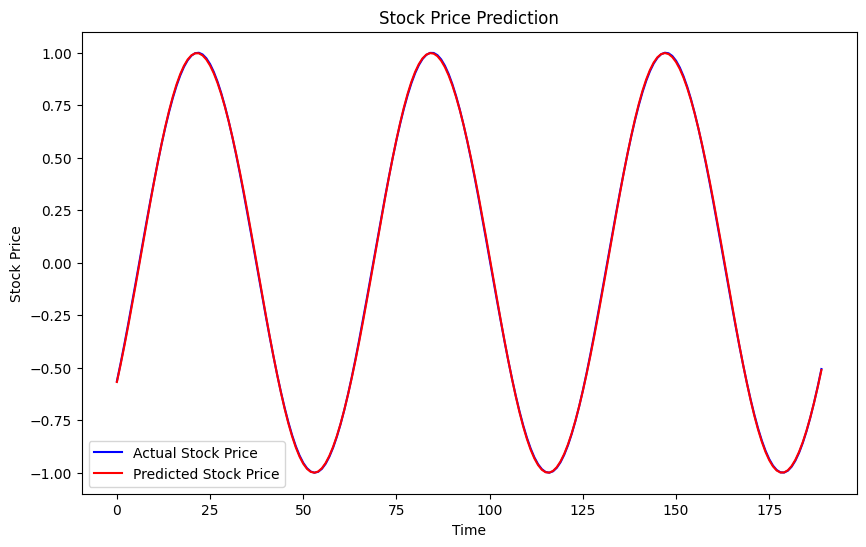

In [2]:
#install necessary libraries
!pip install tensorflow numpy pandas matplotlib
 #import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 #load and preprocess the dataset
 #for simplicity ,let's  use a synthetic dataset .replace this with actual stock data
data = np.sin(np.linspace(0,100,1000))
dataset =pd.DataFrame(data,columns=['Close'])

 #normalize the dataset
dataset['Close'] = dataset['Close']/dataset['Close'].max()

 #create sequence for the LSTM

sequence_length = 50
X=[]
y=[]
for i in range (len(dataset)-sequence_length):
  X.append(dataset['Close'][i:i+sequence_length])
  y.append(dataset['Close'][i+sequence_length])
X=np.array(X)
y=np.array(y)
 #reshape Xto be [samples,time staeps,feature]
X=np.reshape(X,(X.shape[0],X.shape[1],1))
  #split the data into training and testing sets
train_size=int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]
#build a LSTM model
model=Sequential([
  LSTM(50,return_sequences=True,input_shape=(sequence_length,1)),
  LSTM(50,return_sequences=False),
  Dense(25),
  Dense(1)
    ])
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
#train the model
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))
#make predictions
predictions = model.predict(X_test)

#plot the predictions
plt.figure(figsize=(10,6))
plt.plot(y_test,color='blue',label='Actual Stock Price')
plt.plot(predictions,color='red',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()